# Diagnosing Bias and Variance
**What We Cover in This Notebook**

🔹 Build dataset

🔹 Train models

🔹 Compare errors

🔹 Detect bias/variance

🔹 Pick best model

🔹 Test final accuracy

# import libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split



# Dataset

In [3]:
# Create a synthetic dataset
np.random.seed(42)

x = np.linspace(-5, 5, 60).reshape(-1, 1)
noise = np.random.normal(0, 6, size=(60, 1))

y = 3 * x**2 + 2 * x + 5 + noise

# Put into a DataFrame for viewing
data = pd.DataFrame({"x": x.flatten(), "y": y.flatten()})
data.head()

,x,y
0,-5.000000,72.980285
1,-4.830508,64.510834
2,-4.661017,64.739334
3,-4.491525,65.676530
4,-4.322034,50.990943


# Visualize Data

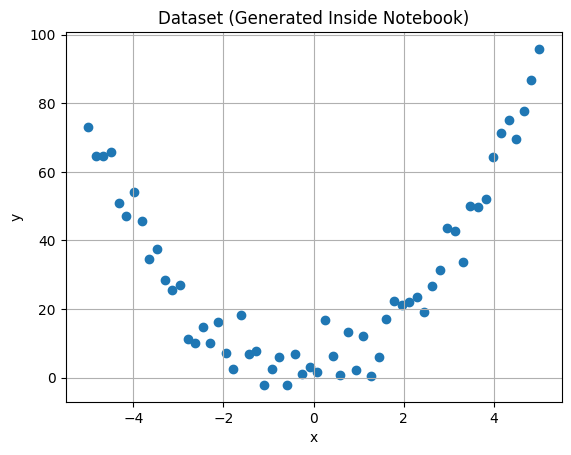

In [4]:
plt.scatter(x, y)
plt.title("Dataset (Generated Inside Notebook)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Train / CV / Test Split

In [5]:
# 60% train, 20% CV, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_cv, x_test, y_cv, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("Train size:", len(x_train))
print("CV size:", len(x_cv))
print("Test size:", len(x_test))

Train size: 36
CV size: 12
Test size: 12


# Train Polynomial Model

In [6]:
degrees = range(1, 11)
train_errors = []
cv_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)

    x_train_poly = poly.fit_transform(x_train)
    x_cv_poly = poly.transform(x_cv)

    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    y_train_pred = model.predict(x_train_poly)
    y_cv_pred = model.predict(x_cv_poly)

    train_errors.append(mean_absolute_error(y_train, y_train_pred))
    cv_errors.append(mean_absolute_error(y_cv, y_cv_pred))

# Plot Training vs CV Error (Bias/Variance)

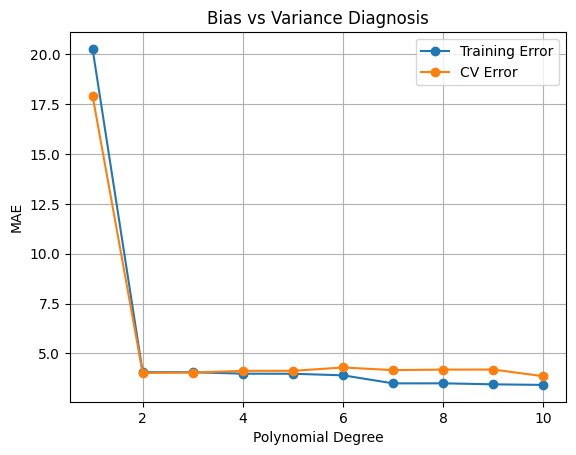

In [7]:
plt.plot(degrees, train_errors, marker='o', label="Training Error")
plt.plot(degrees, cv_errors, marker='o', label="CV Error")

plt.xlabel("Polynomial Degree")
plt.ylabel("MAE")
plt.title("Bias vs Variance Diagnosis")
plt.legend()
plt.grid(True)
plt.show()

# Visualize Fits for Different Degrees

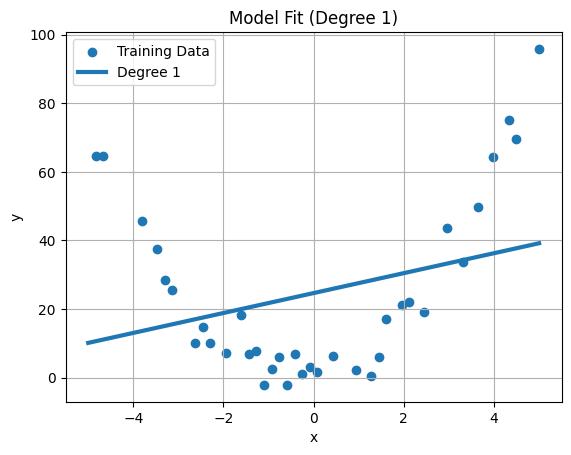

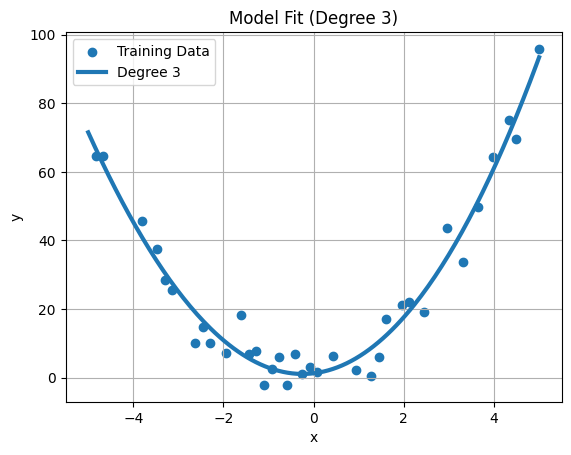

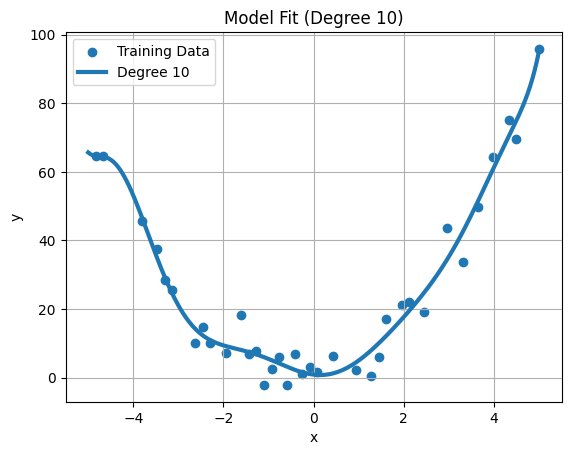

In [8]:
def plot_model_fit(degree):
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)

    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    x_smooth = np.linspace(min(x), max(x), 200).reshape(-1, 1)
    x_smooth_poly = poly.transform(x_smooth)
    y_smooth = model.predict(x_smooth_poly)

    plt.scatter(x_train, y_train, label="Training Data")
    plt.plot(x_smooth, y_smooth, label=f"Degree {degree}", linewidth=3)

    plt.title(f"Model Fit (Degree {degree})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_model_fit(1)
plot_model_fit(3)
plot_model_fit(10)

# Learning Curves

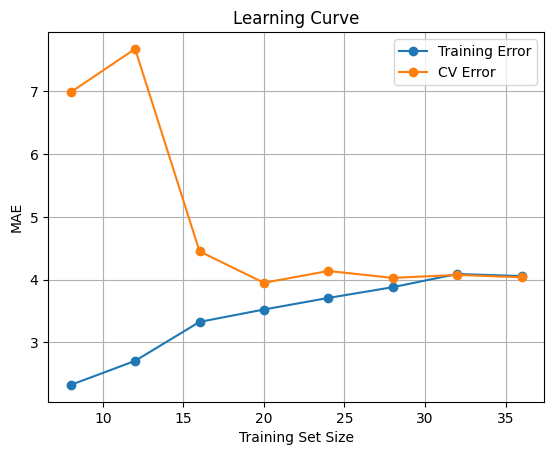

In [9]:
train_sizes = np.linspace(8, len(x_train), 8, dtype=int)
learning_train_err = []
learning_cv_err = []

for size in train_sizes:
    x_small = x_train[:size]
    y_small = y_train[:size]

    poly = PolynomialFeatures(degree=3)
    x_small_poly = poly.fit_transform(x_small)
    x_cv_poly = poly.transform(x_cv)

    model = LinearRegression()
    model.fit(x_small_poly, y_small)

    y_small_pred = model.predict(x_small_poly)
    y_cv_pred = model.predict(x_cv_poly)

    learning_train_err.append(mean_absolute_error(y_small, y_small_pred))
    learning_cv_err.append(mean_absolute_error(y_cv, y_cv_pred))

plt.plot(train_sizes, learning_train_err, marker='o', label="Training Error")
plt.plot(train_sizes, learning_cv_err, marker='o', label="CV Error")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.show()

# Final Test Evaluation

Choose best degree

Look at your earlier graph.

Usually for this synthetic dataset: degree = 2 or 3 works best.

In [15]:
best_degree = 3 # update after seeing your graph

poly = PolynomialFeatures(best_degree)

x_train_cv = np.vstack([x_train, x_cv])
y_train_cv = np.vstack([y_train, y_cv])

x_train_cv_poly = poly.fit_transform(x_train_cv)
x_test_poly = poly.transform(x_test)

model = LinearRegression()
model.fit(x_train_cv_poly, y_train_cv)

y_test_pred = model.predict(x_test_poly)
test_error = mean_absolute_error(y_test, y_test_pred)

print("Final Test Set Error =", test_error)

Final Test Set Error = 5.078297201438187
